In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## **Data Preprocessing**

### Data Cleaning

In [3]:
data=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/data.csv')
print(data.shape)

(867, 22)


In [4]:
data.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
data=data.drop(columns=['Unnamed: 0','age_desc'],axis=1)
print(data.shape)

(867, 20)


In [6]:
data.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                54
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
relation            6
Class/ASD           2
dtype: int64

In [7]:
# 0: Non-Autistic, 1: Autistic
data['Class/ASD'].value_counts()

Class/ASD
NO     652
YES    215
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         867 non-null    int64  
 1   A2_Score         867 non-null    int64  
 2   A3_Score         867 non-null    int64  
 3   A4_Score         867 non-null    int64  
 4   A5_Score         867 non-null    int64  
 5   A6_Score         867 non-null    int64  
 6   A7_Score         867 non-null    int64  
 7   A8_Score         867 non-null    int64  
 8   A9_Score         867 non-null    int64  
 9   A10_Score        867 non-null    int64  
 10  age              865 non-null    float64
 11  gender           867 non-null    object 
 12  ethnicity        867 non-null    object 
 13  jundice          867 non-null    object 
 14  austim           867 non-null    object 
 15  contry_of_res    867 non-null    object 
 16  used_app_before  867 non-null    object 
 17  result          

In [9]:
data.loc[0]

A1_Score                        1
A2_Score                        1
A3_Score                        1
A4_Score                        1
A5_Score                        0
A6_Score                        0
A7_Score                        1
A8_Score                        1
A9_Score                        0
A10_Score                       0
age                          26.0
gender                          f
ethnicity          White-European
jundice                        no
austim                         no
contry_of_res       United States
used_app_before                no
result                        6.0
relation                     Self
Class/ASD                      NO
Name: 0, dtype: object

In [10]:
# renaming features

data = data.rename(columns={'austim': 'relative_with_ASD'})
data = data.rename(columns={'contry_of_res': 'country'})
data = data.rename(columns={'jundice': 'jaundice'})

In [11]:
col = ['gender', 'ethnicity', 'jaundice', 'relative_with_ASD', 'country','used_app_before','relation']
for column_name in col:
    unique_values = data[column_name].unique()
    print(f'Unique values in {column_name}: {unique_values}\n')

Unique values in gender: ['f' 'm']

Unique values in ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Unique values in jaundice: ['no' 'yes']

Unique values in relative_with_ASD: ['no' 'yes']

Unique values in country: ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Ango

In [12]:
data.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  2
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
Class/ASD            0
dtype: int64

In [13]:
data.duplicated().sum()

9

In [14]:
# remove duplicate values

data.drop_duplicates(inplace=True)
print(data.shape)

(858, 20)


In [15]:
(data.ethnicity=='?').sum()

135

In [16]:
(data.relation =='?').sum()

102

In [17]:
# find out how many rows have ? for both ethinicity and relation

len(data[(data.ethnicity=='?') & (data.relation=='?')])

95

In [18]:
(data.ethnicity=='Others').sum()

34

In [19]:
(data.ethnicity=='others').sum()

1

In [20]:
data['ethnicity'].replace('others', 'Others', inplace=True)

In [21]:
(data.ethnicity=='Others').sum()

35

In [22]:
for column_name in data.columns:
    unique_values = data[column_name].unique()
    if '?' in unique_values:
        print(column_name)

ethnicity
relation


In [23]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'relative_with_ASD', 'country',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [24]:
summary= data.describe()
summary

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,856.000000,858.000000
mean,0.684149,0.459207,0.449883,0.472028,0.470862,0.286713,0.404429,0.622378,0.344988,0.579254,26.679907,4.773893
std,0.465125,0.498624,0.497772,0.499508,0.499441,0.452490,0.491067,0.485075,0.475642,0.493967,16.235197,2.676693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### **DATA VISUALISATION**

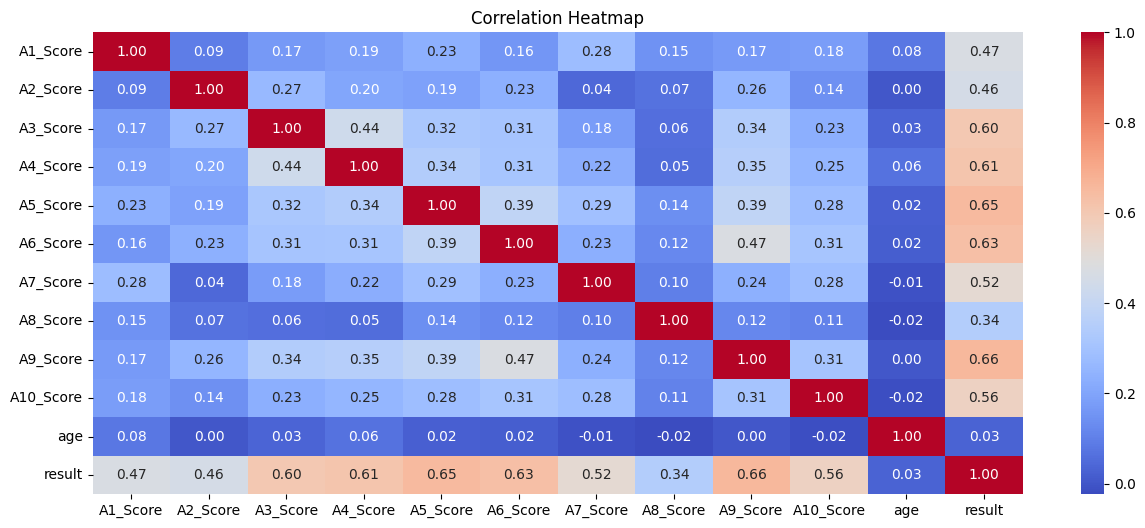

In [26]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(numeric_only = True),annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

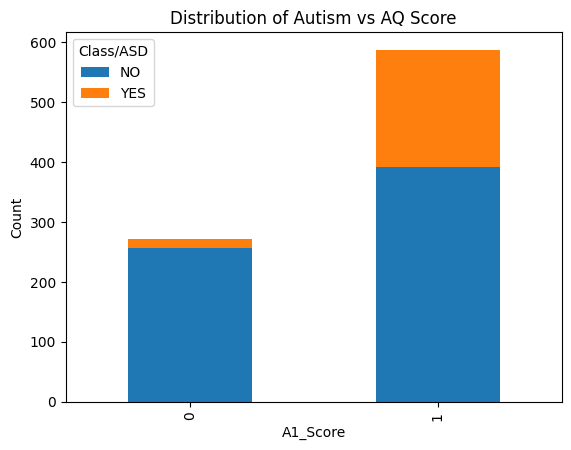

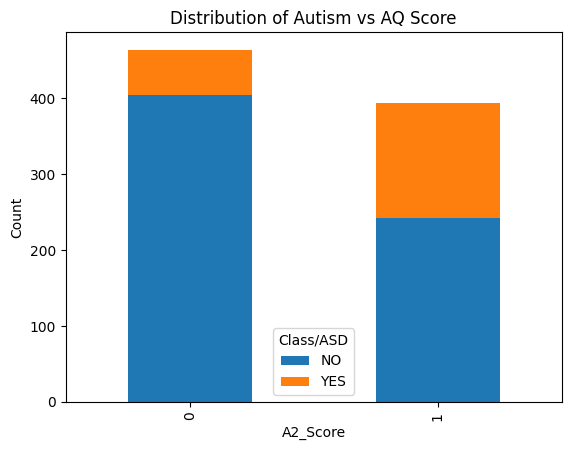

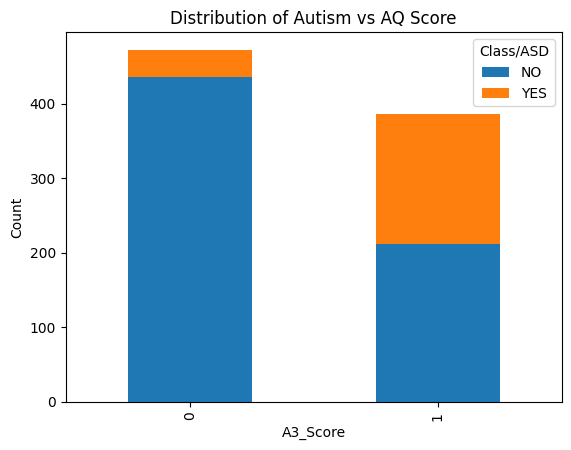

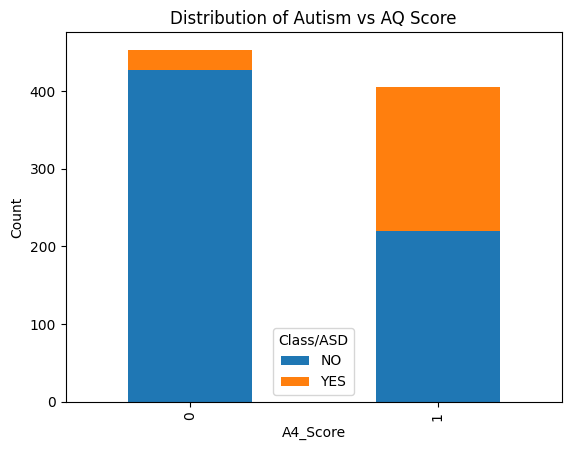

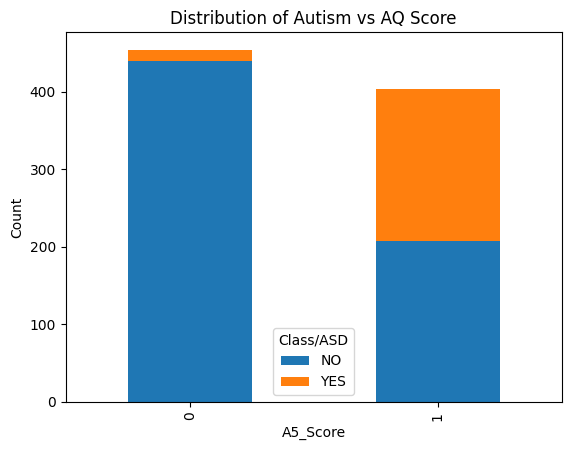

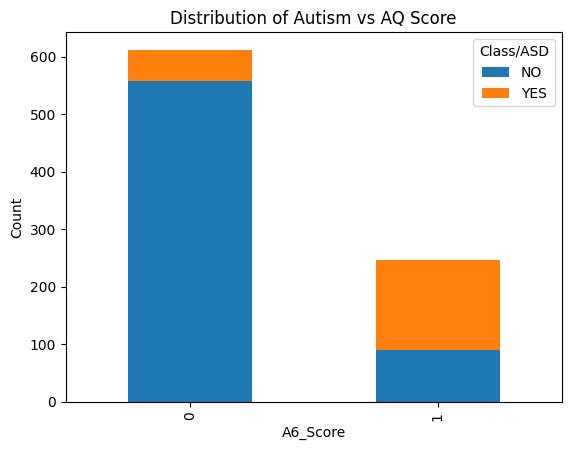

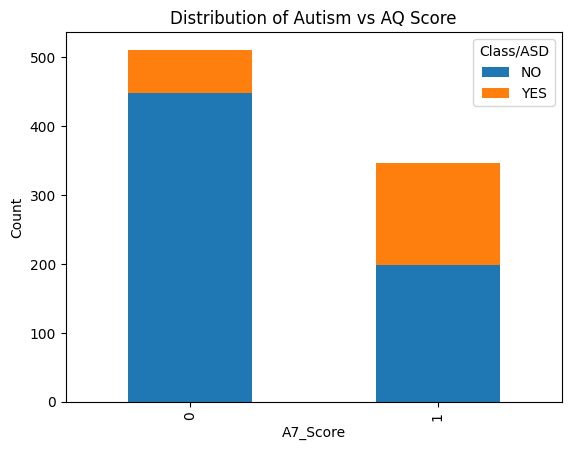

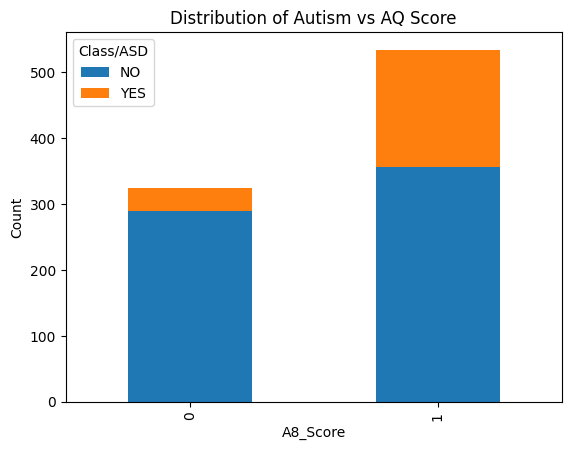

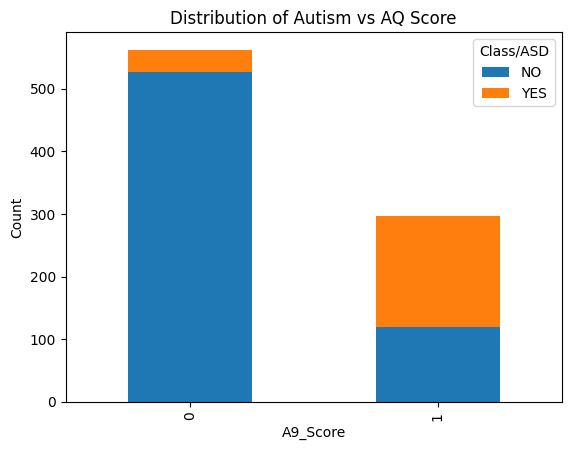

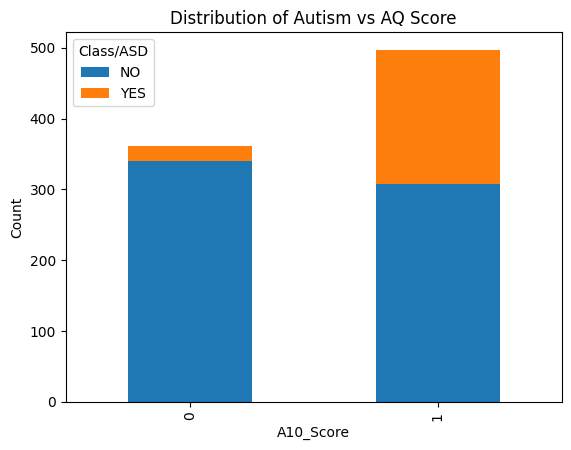

In [27]:
AQ_values = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
for column in AQ_values:
  AQ_class_counts = data.groupby([column, data['Class/ASD']]).size().unstack()
  AQ_class_counts.plot(kind='bar', stacked=True)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Distribution of Autism vs AQ Score')
  plt.show()

Text(0.5, 1.0, 'Age Distribution')

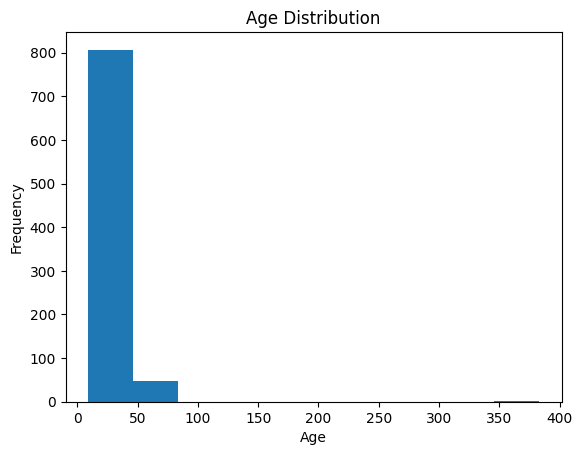

In [28]:
data['age'].plot.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Result Distribution')

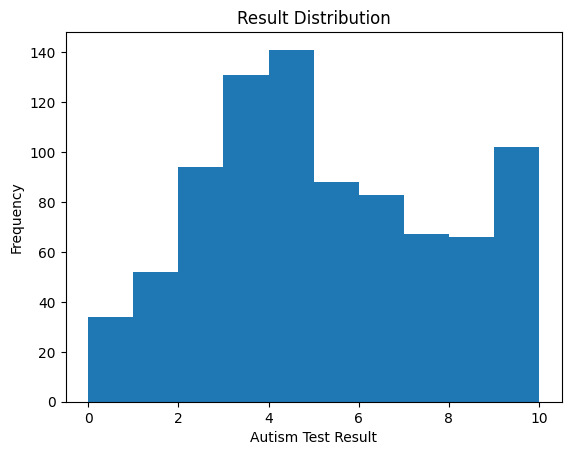

In [29]:
data['result'].plot.hist()
plt.xlabel('Autism Test Result')
plt.ylabel('Frequency')
plt.title('Result Distribution')

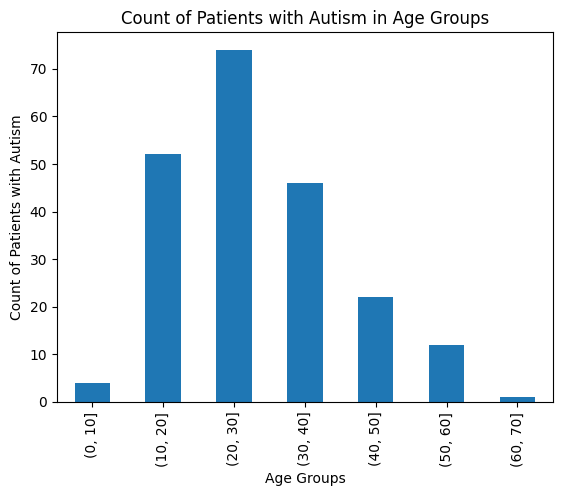

In [30]:
### Interpretation - Most of the people diagnosed with Autism were in the age group of 20-30

age_groups = [0, 10, 20, 30, 40, 50, 60, 70]

data['Age_Group'] = pd.cut(data['age'], bins=age_groups)

# Filter the DataFrame to select rows with target class 1
class_1_data = data[data['Class/ASD'] == 'YES']

# Count the number of patients in each age group with target class 1
age_group_counts = class_1_data['Age_Group'].value_counts()
age_group_counts = age_group_counts.sort_index()
age_group_counts.plot.bar()

plt.xlabel('Age Groups')
plt.ylabel('Count of Patients with Autism')
plt.title('Count of Patients with Autism in Age Groups')

# Show the bar plot
plt.show()

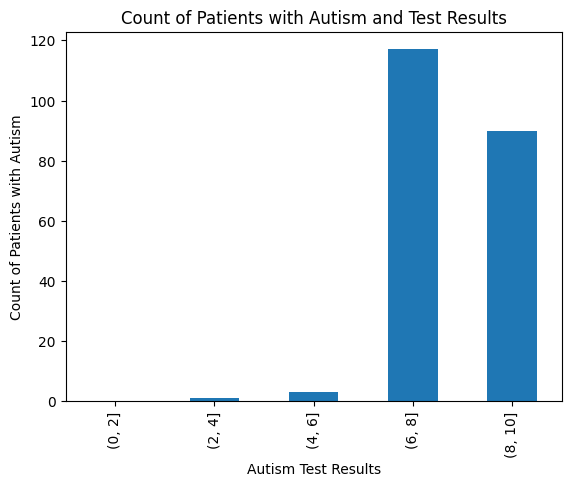

In [31]:
### Interpretation - Most of the people diagnosed with Autism has AQ test scores between 11 to 14

autism_test_groups = [0,2,4,6,8,10]

data['autism_test_groups'] = pd.cut(data['result'], bins=autism_test_groups)

# Filter the DataFrame to select rows with target class 1
class_1_data = data[data['Class/ASD'] == 'YES']

# Count the number of patients in each age group with target class 1
age_group_counts = class_1_data['autism_test_groups'].value_counts()
age_group_counts = age_group_counts.sort_index()
age_group_counts.plot.bar()

plt.xlabel('Autism Test Results')
plt.ylabel('Count of Patients with Autism')
plt.title('Count of Patients with Autism and Test Results')

# Show the bar plot
plt.show()

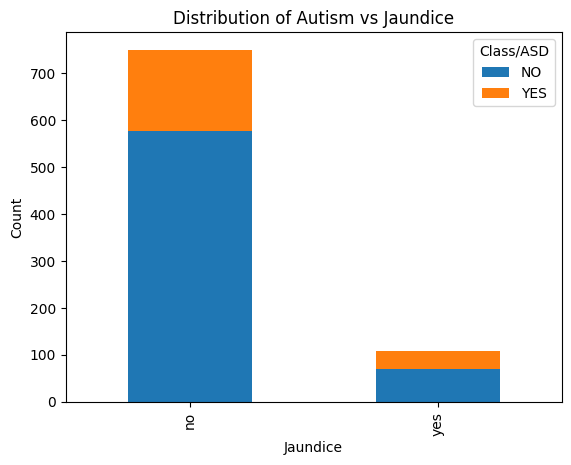

In [32]:
### Interpretation - More number of people had Autism without having any jaundice at birth

jaundice_class_counts = data.groupby(['jaundice', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
jaundice_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Jaundice')

# Show the grouped bar chart
plt.show()

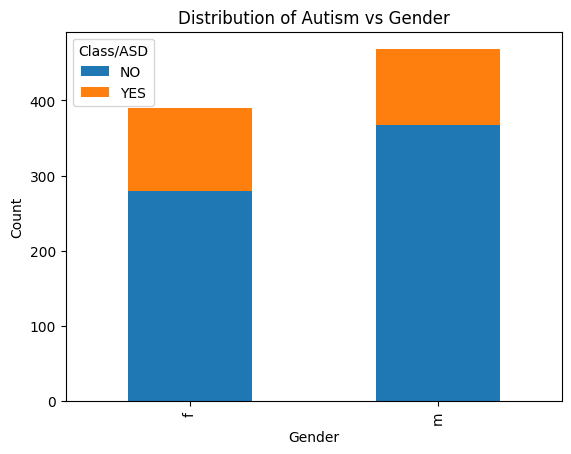

In [33]:
### Interpretation - The number of males having Autism were more than that of females

gender_class_counts = data.groupby(['gender', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
gender_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Gender')

# Show the grouped bar chart
plt.show()

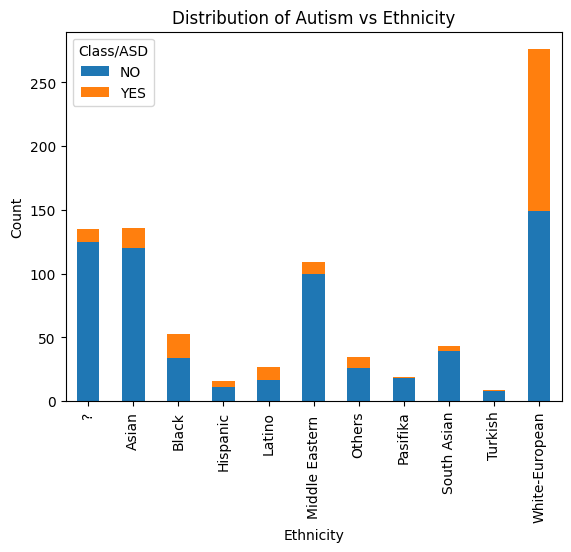

In [34]:
### Interpretation - The number of white europeans having Autism are more in number

ethnicity_class_counts = data.groupby(['ethnicity', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Ethnicity')

# Show the grouped bar chart
plt.show()

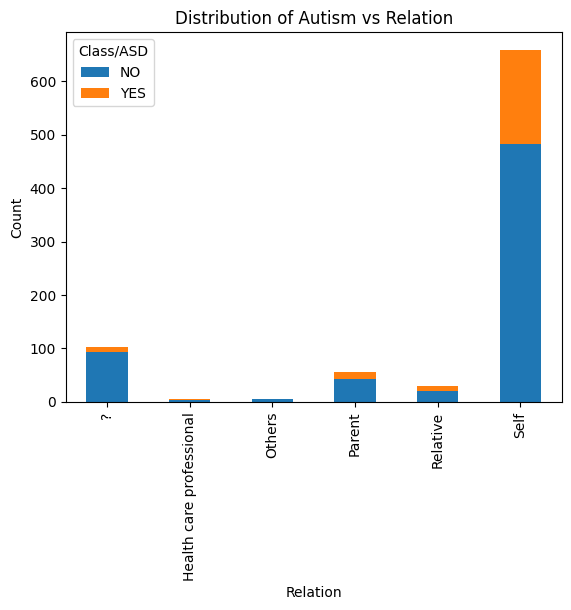

In [35]:
### Interpretation - Most of the Autism patients themselves took the screening test

ethnicity_class_counts = data.groupby(['relation', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Relation')

# Show the grouped bar chart
plt.show()

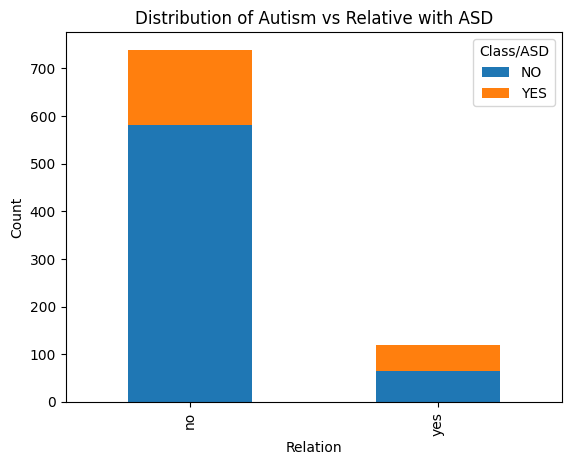

In [36]:
### Interpretation - most people did not have any relative diagnosed with ASD

ethnicity_class_counts = data.groupby(['relative_with_ASD', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Relative with ASD')

# Show the grouped bar chart
plt.show()

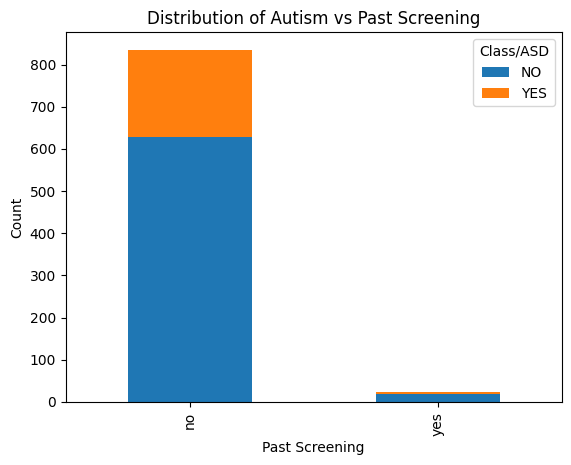

In [37]:
### Interpretation - very few Autistic patients were diagnosed with ASD after the present screening test

ethnicity_class_counts = data.groupby(['used_app_before', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Past Screening')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Past Screening')

# Show the grouped bar chart
plt.show()

<Figure size 2000x600 with 0 Axes>

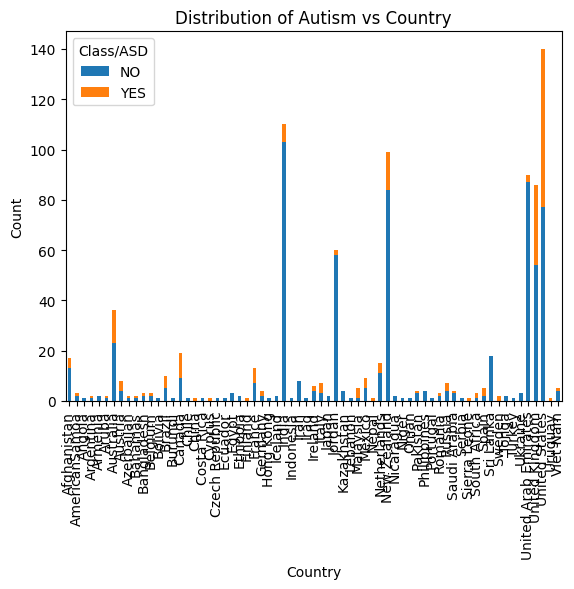

In [38]:
### Interpretation - most people with ASD were from the US in this screening test"

plt.figure(figsize=(20, 6))
ethnicity_class_counts = data.groupby(['country', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Country')

# Show the grouped bar chart
plt.show()

### **TRAIN TEST SPLIT**

In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'relative_with_ASD', 'country',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# X=data.drop('Class/ASD',axis=1)
# y=data['Class/ASD']
# print(X.shape,y.shape)

(858, 19) (858,)


In [ ]:
'''from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    #random_state=45,
                                                    stratify=data['Class/ASD']
                                                    )
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) '''


(772, 19) (86, 19) (772,) (86,)


In [ ]:
'''X_train =  X_train.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_train.csv')
X_test =  X_test.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_test.csv')
y_train =  y_train.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_train.csv')
y_test =  y_test.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_test.csv')'''

In [34]:
# read the csv's

X_train =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_train_new.csv')
X_test =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_test_new.csv')

y_train =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_train_new.csv')
y_test =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_test_new.csv')

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(686, 20) (172, 20) (686, 2) (172, 2)


In [36]:
X_train = X_train.drop(columns = ['Unnamed: 0'],axis=1)
X_test = X_test.drop(columns=['Unnamed: 0'],axis=1)
y_train = y_train.drop(columns = ['Unnamed: 0'],axis=1)
y_test = y_test.drop(columns=['Unnamed: 0'],axis=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(686, 19) (172, 19) (686, 1) (172, 1)


In [37]:
y_train=y_train['Class/ASD']
y_test=y_test['Class/ASD']
print(y_train.shape,y_test.shape)

(686,) (172,)


## **DATA IMPUTATION**

In [38]:
X_train=X_train.replace('?', np.nan)
X_test=X_test.replace('?', np.nan)

In [39]:
X_train.isnull().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    2
gender                 0
ethnicity            111
jaundice               0
relative_with_ASD      0
country                0
used_app_before        0
result                 0
relation              85
dtype: int64

In [40]:
X_test.isnull().sum()

A1_Score              0
A2_Score              0
A3_Score              0
A4_Score              0
A5_Score              0
A6_Score              0
A7_Score              0
A8_Score              0
A9_Score              0
A10_Score             0
age                   0
gender                0
ethnicity            24
jaundice              0
relative_with_ASD     0
country               0
used_app_before       0
result                0
relation             17
dtype: int64

In [41]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encode categorical values using LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

train_eth_le = le1.fit_transform(X_train['ethnicity'].astype(str))
test_eth_le = le1.transform(X_test['ethnicity'].astype(str))
print(le1.classes_)
pickle.dump(le1,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_ethnicity.pkl','wb'))

train_rel_le = le2.fit_transform(X_train['relation'].astype(str))
test_rel_le = le2.transform(X_test['relation'].astype(str))
print(le2.classes_)
pickle.dump(le2,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_relation.pkl','wb'))

# Initialize the KNNImputer with the number of neighbors you want to consider (e.g., 3)
knn_imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation on the specified columns for training data
X_train['ethnicity'] = knn_imputer.fit_transform(train_eth_le.reshape(-1,1))
X_train['relation'] = knn_imputer.fit_transform(train_rel_le.reshape(-1,1))
X_train['age'] = knn_imputer.fit_transform(X_train['age'].values.reshape(-1,1))

# Perform KNN imputation on the specified columns for test data
X_test['ethnicity'] = knn_imputer.transform(test_eth_le.reshape(-1,1))
X_test['relation'] = knn_imputer.transform(test_rel_le.reshape(-1,1))
pickle.dump(knn_imputer,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/knn_imputer.pkl','wb'))

# X_test['age'] = knn_imputer.transform(X_test['age'].values.reshape(-1,1)) # no null values of age in test

['Asian' 'Black' 'Hispanic' 'Latino' 'Middle Eastern ' 'Others' 'Pasifika'
 'South Asian' 'Turkish' 'White-European' 'nan']
['Health care professional' 'Others' 'Parent' 'Relative' 'Self' 'nan']


In [42]:
X_train.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
dtype: int64

In [43]:
X_test.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
dtype: int64

### **OUTLIER DETECTION**

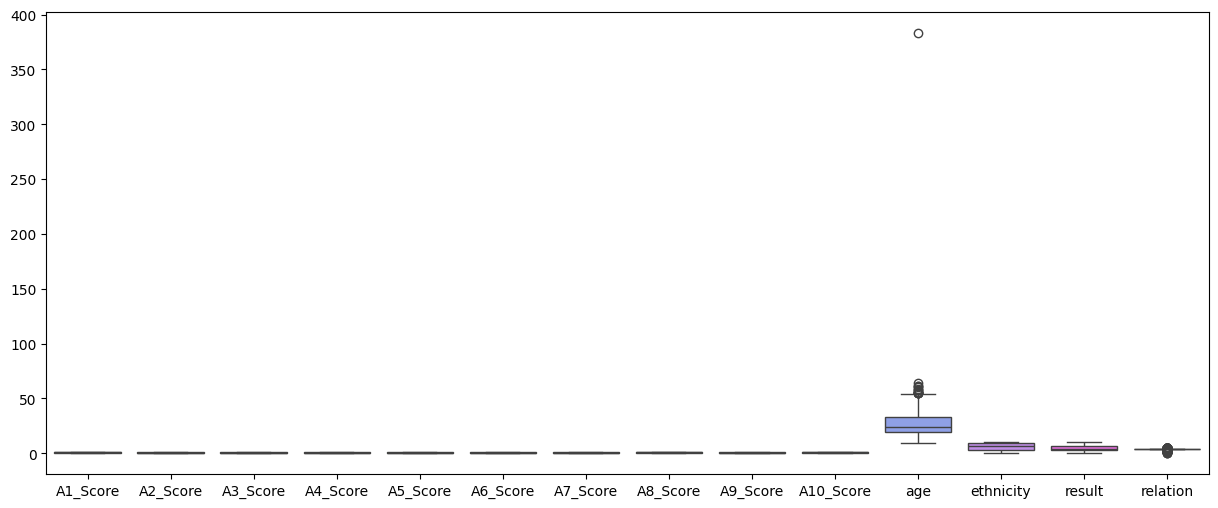

In [44]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train)
plt.show()

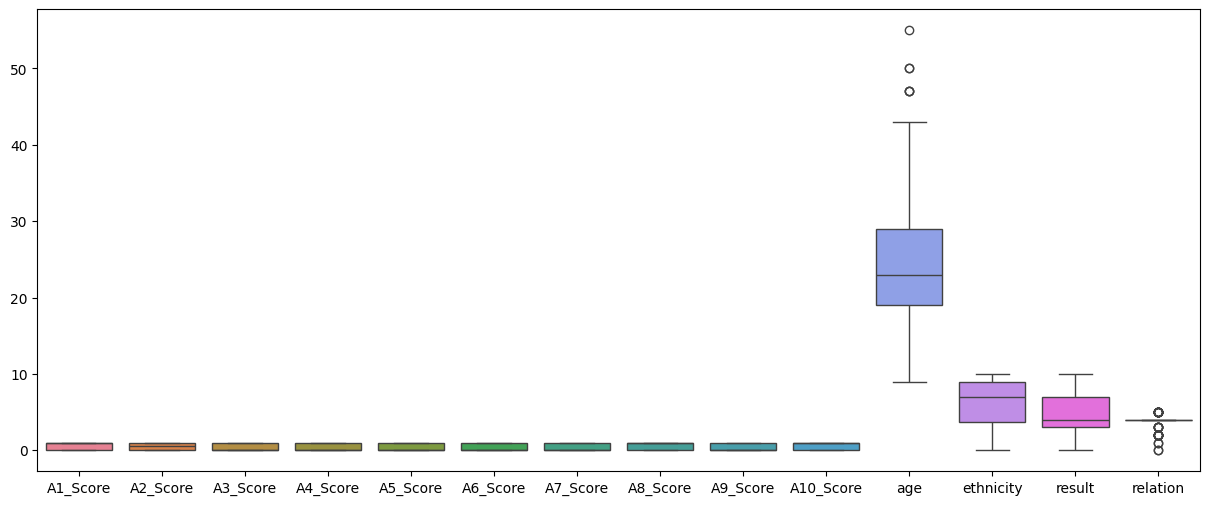

In [45]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_test)
plt.show()

In [46]:
index_to_drop = X_train[X_train['age'] == 383].index

X_train = X_train.drop(index_to_drop)
y_train = y_train.drop(index_to_drop)
print(X_train.shape,y_train.shape)

(685, 19) (685,)


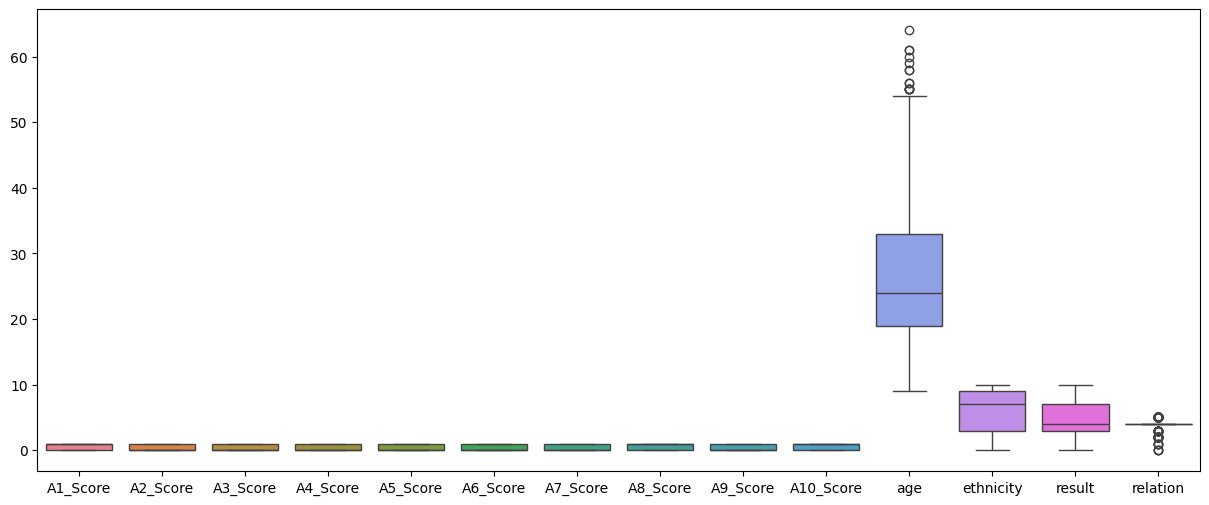

In [47]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train)
plt.show()

In [48]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(685, 19) (172, 19) (685,) (172,)


### **FEATURE ENGINEERING**

#### Polynomial Features

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=False)
X_train_poly = poly.fit_transform(X_train[['age', 'result']])
X_test_poly = poly.transform(X_test[['age', 'result']])
print(X_train_poly.shape,X_test_poly.shape)


(685, 6) (172, 6)


In [55]:
X_train_poly = X_train_poly[:,1:]
X_test_poly = X_test_poly[:,1:]
print(X_train_poly.shape,X_test_poly.shape)

(685, 5) (172, 5)


In [56]:
pd.DataFrame(X_train_poly)

,0,1,2,3,4
0,29.0,2.0,841.0,58.0,4.0
1,42.0,7.0,1764.0,294.0,49.0
2,46.0,3.0,2116.0,138.0,9.0
3,24.0,5.0,576.0,120.0,25.0
4,33.0,10.0,1089.0,330.0,100.0
...,...,...,...,...,...
680,24.0,7.0,576.0,168.0,49.0
681,22.0,8.0,484.0,176.0,64.0
682,26.0,8.0,676.0,208.0,64.0
683,51.0,10.0,2601.0,510.0,100.0


#### Binning

In [57]:
# Binning  : age

# quantile based binning
X_train['age_bins']  = pd.qcut(X_train['age'],4,labels=None,duplicates='drop')

bins = [0,19,24,32,100]
labels = [0,1,2,3]

X_train['age_bins'] = pd.cut(X_train['age'],labels=labels,bins=bins).astype('int')
X_test['age_bins'] = pd.cut(X_test['age'],labels=labels,bins=bins).astype('int')

In [58]:
X_train['age_bins'].unique()

array([2, 3, 1, 0])

In [59]:
# Binning  : result

X_train['result_bins']  = pd.qcut(X_train['result'],4,labels=None,duplicates='drop')

bins = [-1,3,4,7,50]
labels = [0,1,2,3]

X_train['result_bins'] = pd.cut(X_train['result'],labels=labels,bins=bins).astype('int')
X_test['result_bins'] = pd.cut(X_test['result'],labels=labels,bins=bins).astype('int')

In [60]:
X_train['result_bins'].unique()

array([0, 2, 3, 1])

### ENCODING CATEGORICAL VARIABLES

In [49]:
# features=['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']

le3 = LabelEncoder()
train_gen_le = le3.fit_transform(X_train['gender'].astype(str))
test_gen_le = le3.transform(X_test['gender'].astype(str))
print(le3.classes_)

le4 = LabelEncoder()
train_jaun_le = le4.fit_transform(X_train['jaundice'].astype(str))
test_jaun_le = le4.transform(X_test['jaundice'].astype(str))
print(le4.classes_)

le5 = LabelEncoder()
train_relative_le = le5.fit_transform(X_train['relative_with_ASD'].astype(str))
test_relative_le = le5.transform(X_test['relative_with_ASD'].astype(str))
print(le5.classes_)

le6 = LabelEncoder()
data_country_le = le6.fit_transform(data['country'].astype(str))
train_country_le = le6.transform(X_train['country'].astype(str))
test_country_le = le6.transform(X_test['country'].astype(str))
print(le6.classes_)

le7 = LabelEncoder()
train_used_le = le7.fit_transform(X_train['used_app_before'].astype(str))
test_used_le = le7.transform(X_test['used_app_before'].astype(str))
print(le7.classes_)


['f' 'm']
['no' 'yes']
['no' 'yes']
['Afghanistan' 'AmericanSamoa' 'Angola' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belgium'
 'Bolivia' 'Brazil' 'Burundi' 'Canada' 'Chile' 'China' 'Costa Rica'
 'Cyprus' 'Czech Republic' 'Ecuador' 'Egypt' 'Ethiopia' 'Finland' 'France'
 'Germany' 'Hong Kong' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Lebanon' 'Malaysia'
 'Mexico' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua' 'Niger' 'Oman'
 'Pakistan' 'Philippines' 'Portugal' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Sierra Leone' 'South Africa' 'Spain' 'Sri Lanka' 'Sweden'
 'Tonga' 'Turkey' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Viet Nam']
['no' 'yes']


In [ ]:
# features=['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']

pickle.dump(le3,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_gender.pkl','wb'))
pickle.dump(le4,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_jaundice.pkl','wb'))
pickle.dump(le5,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_relative.pkl','wb'))
pickle.dump(le6,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_country.pkl','wb'))
pickle.dump(le7,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_used_app.pkl','wb'))

In [50]:
# features=['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']

X_train['gender']=train_gen_le
X_test['gender']=test_gen_le

X_train['jaundice']= train_jaun_le
X_test['jaundice']= test_jaun_le

X_train['relative_with_ASD']= train_relative_le
X_test['relative_with_ASD']= test_relative_le

X_train['country']= train_country_le
X_test['country']= test_country_le

X_train['used_app_before']= train_used_le
X_test['used_app_before']= test_used_le

In [ ]:
'''from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse=False, handle_unknown='ignore')
features=['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']

encoded_data=ohe.fit(data[features])
encoded_data_train = ohe.transform(X_train[features])
encoded_data_test = ohe.transform(X_test[features])

# Convert the encoded features to DataFrames
encoded_columns = ohe.get_feature_names_out(features)
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoded_columns, index=X_train.index)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_columns, index=X_test.index)

# Drop the original categorical columns from X_train and X_test
X_train_dropped = X_train.drop(columns=features)
X_test_dropped = X_test.drop(columns=features)

# Concatenate the original data (without the categorical columns) with the encoded columns
X_train = pd.concat([X_train_dropped, encoded_df_train], axis=1)
X_test = pd.concat([X_test_dropped, encoded_df_test], axis=1)

pickle.dump(ohe,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/one_hot_encoder.pkl','wb'))

print(X_train.shape,X_test.shape)'''

(685, 89) (172, 89)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
'''# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the OrdinalEncoder
# oe = OrdinalEncoder()
le3=LabelEncoder()

encoded_data = le3.fit_transform(data[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])
encoded_data_train = le3.transform(X_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])
encoded_data_test = le3.transform(X_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])
pickle.dump(le3,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_other_categories.pkl','wb'))

# Replace the original columns with the encoded values
X_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_train
X_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_test'''


"# from sklearn.preprocessing import OrdinalEncoder\nfrom sklearn.preprocessing import LabelEncoder\n\n# Initialize the OrdinalEncoder\n# oe = OrdinalEncoder()\nle3=LabelEncoder()\n\nencoded_data = le3.fit_transform(data[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])\nencoded_data_train = le3.transform(X_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])\nencoded_data_test = le3.transform(X_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])\npickle.dump(le3,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/le_other_categories.pkl','wb'))\n\n# Replace the original columns with the encoded values\nX_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_train\nX_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_test"

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 685
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           685 non-null    int64  
 1   A2_Score           685 non-null    int64  
 2   A3_Score           685 non-null    int64  
 3   A4_Score           685 non-null    int64  
 4   A5_Score           685 non-null    int64  
 5   A6_Score           685 non-null    int64  
 6   A7_Score           685 non-null    int64  
 7   A8_Score           685 non-null    int64  
 8   A9_Score           685 non-null    int64  
 9   A10_Score          685 non-null    int64  
 10  age                685 non-null    float64
 11  gender             685 non-null    int64  
 12  ethnicity          685 non-null    float64
 13  jaundice           685 non-null    int64  
 14  relative_with_ASD  685 non-null    int64  
 15  country            685 non-null    int64  
 16  used_app_before    685 non-null

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           172 non-null    int64  
 1   A2_Score           172 non-null    int64  
 2   A3_Score           172 non-null    int64  
 3   A4_Score           172 non-null    int64  
 4   A5_Score           172 non-null    int64  
 5   A6_Score           172 non-null    int64  
 6   A7_Score           172 non-null    int64  
 7   A8_Score           172 non-null    int64  
 8   A9_Score           172 non-null    int64  
 9   A10_Score          172 non-null    int64  
 10  age                172 non-null    float64
 11  gender             172 non-null    int64  
 12  ethnicity          172 non-null    float64
 13  jaundice           172 non-null    int64  
 14  relative_with_ASD  172 non-null    int64  
 15  country            172 non-null    int64  
 16  used_app_before    172 non

### **FEATURE SELECTION**

### Extra Trees Classifier

In [44]:
# Feature Importance : Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(X_train,y_train)

ExtraTreesClassifier()

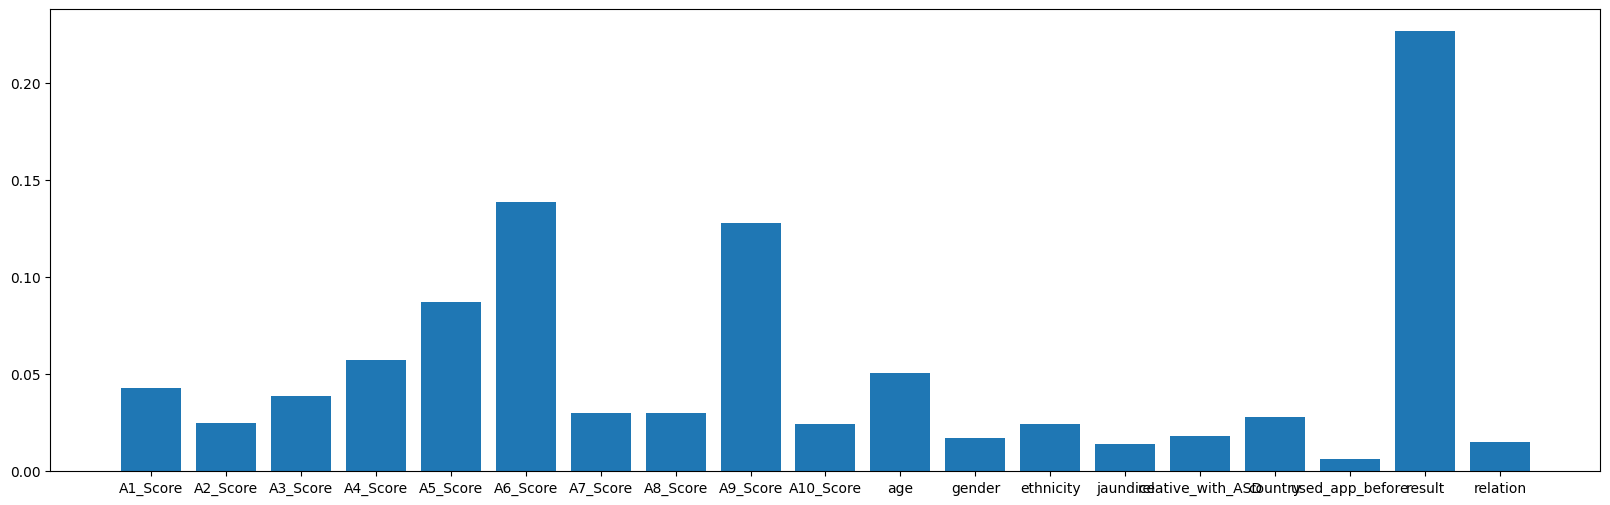

In [45]:
scores = clf.feature_importances_
plt.figure(figsize=(20,6))
plt.bar(X_train.columns,scores)
plt.show()

In [46]:
features = list(X_train.columns[scores > 0.0125])

In [47]:
X_train_fs = X_train[features]
X_test_fs = X_test[features]
print(X_train_fs.shape, X_test_fs.shape)

(685, 18) (172, 18)


### ANOVA F-TEST

In [48]:
num=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
    'ethnicity', 'jaundice', 'relative_with_ASD', 'country','used_app_before', 'result', 'relation']

In [49]:
X_num_train= X_train[num]
X_num_test= X_test[num]

Feature 0: 74.636594
Feature 1: 64.042902
Feature 2: 154.396866
Feature 3: 184.814016
Feature 4: 242.974383
Feature 5: 356.890070
Feature 6: 91.301048
Feature 7: 39.738163
Feature 8: 343.465104
Feature 9: 103.828430
Feature 10: 23.722604
Feature 11: 7.204059
Feature 12: 12.577969
Feature 13: 6.089846
Feature 14: 20.839776
Feature 15: 3.901114
Feature 16: 0.095707
Feature 17: 861.368181
Feature 18: 1.160197


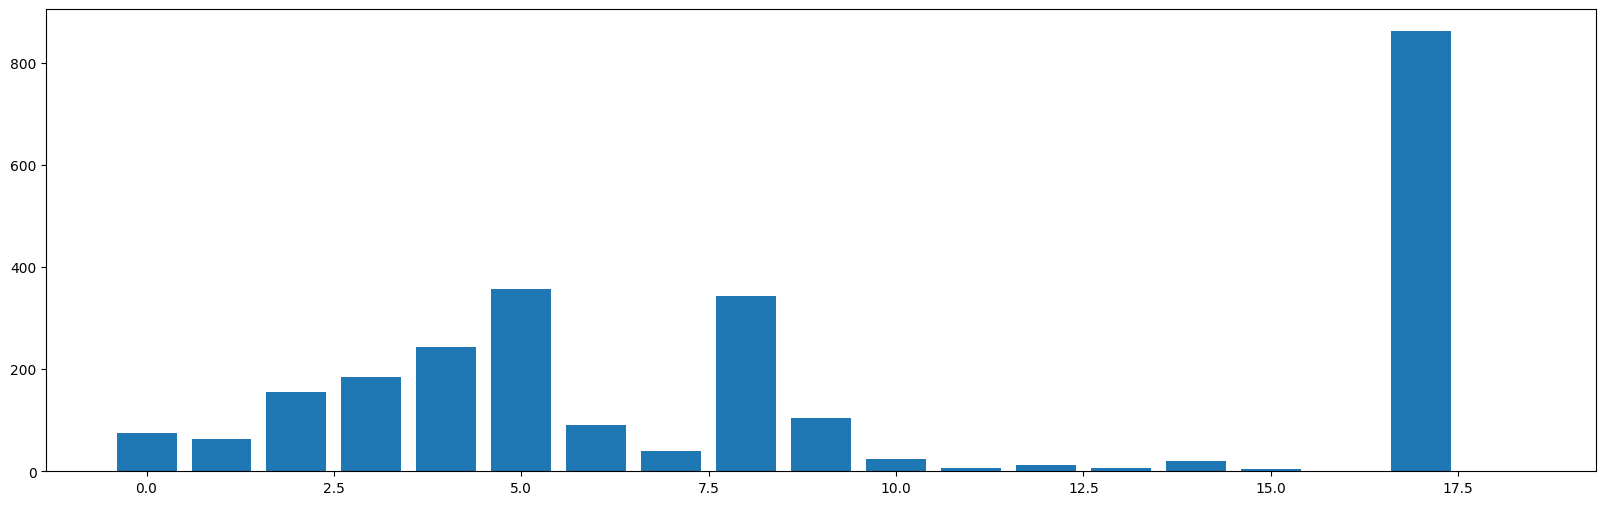

In [50]:
# Applying ANOVA F-Test on X_num

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_num_train, y_train)
# transform train input data
X_num_fs_train = fs.transform(X_num_train)
X_num_fs_test = fs.transform(X_num_test)
# transform
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(20, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### **DATA SCALING**

In [ ]:
'''df_train_poly = pd.DataFrame(X_train_poly)
df_test_poly = pd.DataFrame(X_test_poly)

df_train_poly.columns = ['age^2', 'age*result', 'result^2']
df_test_poly.columns = ['age^2', 'age*result', 'result^2']
print(df_train_poly.shape,df_test_poly.shape)'''

In [ ]:
'''X_train = X_train.reset_index(drop=True)
df_train_poly = df_train_poly.reset_index(drop=True)
X_train_final = pd.concat([X_train, df_train_poly], axis=1)

X_test = X_test.reset_index(drop=True)
df_test_poly = df_test_poly.reset_index(drop=True)
X_test_final = pd.concat([X_test, df_test_poly], axis=1)

print(X_train_final.shape,X_test_final.shape)'''

In [ ]:
'''# Standard Scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)'''

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)
pickle.dump(mms,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/min_max_scalar_new.pkl','wb'))
print(X_train_scaled.shape,X_test_scaled.shape)

(685, 19) (172, 19)


#### ENCODING THE TARGET VARIABLE

In [53]:
# encoding the label

le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [54]:
le.classes_

array(['NO', 'YES'], dtype=object)

### **MODEL BUILDING**

In [55]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### LGBM - Best Model (FLAML)

In [56]:
# flaml- AutoML

# Auto ML : Fast and Light Auto ML FLAML (Microsoft)
from flaml import AutoML
automl = AutoML()
automl.fit(X_train,y_train,time_budget=200,
           metric = 'roc_auc',
           task = 'classification',eval_method='cv',
           #ensemble=True,
           sample_weight_val = 'balanced',
           estimator_list=['lgbm'],
           n_splits=10,
           split_type='stratified' # 'uniform','stratified'
         )
best_model = automl.model #best model

[flaml.automl.logger: 05-28 18:15:06] {1680} INFO - task = classification
[flaml.automl.logger: 05-28 18:15:06] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 05-28 18:15:06] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-28 18:15:06] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 05-28 18:15:06] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-28 18:15:07] {2345} INFO - Estimated sufficient time budget=15840s. Estimated necessary time budget=16s.
[flaml.automl.logger: 05-28 18:15:07] {2392} INFO -  at 1.6s,	estimator lgbm's best error=0.0163,	best estimator lgbm's best error=0.0163
[flaml.automl.logger: 05-28 18:15:07] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-28 18:15:08] {2392} INFO -  at 2.5s,	estimator lgbm's best error=0.0052,	best estimator lgbm's best error=0.0052
[flaml.automl.logger: 05-28 18:15:08] {2219} INFO - iteration 2, current learner lgbm
[flam

In [57]:
automl.best_config

{'n_estimators': 14,
 'num_leaves': 4,
 'min_child_samples': 40,
 'learning_rate': 1.0,
 'log_max_bin': 8,
 'colsample_bytree': 0.6330992272255402,
 'reg_alpha': 0.0022420481791278115,
 'reg_lambda': 22.173958894869305}

In [58]:
y_pred_lgbm = best_model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lgbm)
print(cm)

[[130   0]
 [  1  41]]


In [60]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_lgbm)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.98      0.99        42

    accuracy                           0.99       172
   macro avg       1.00      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



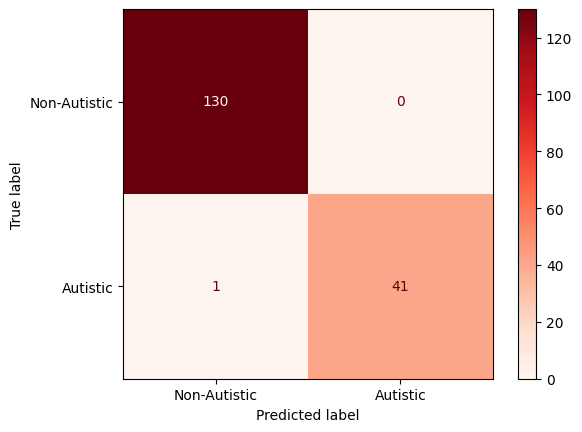

In [61]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Autistic', 'Autistic'])
cm_display.plot(cmap='Reds')
plt.show()

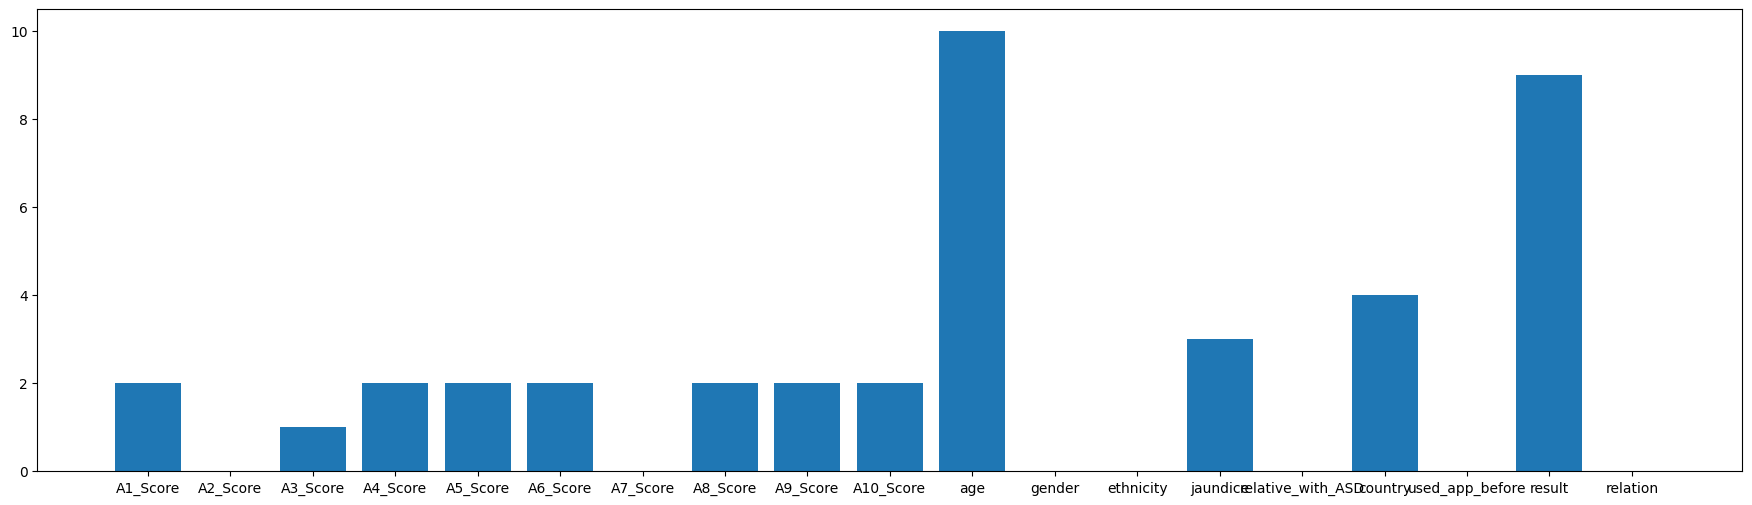

In [67]:
scores = best_model.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns,scores)
plt.show()

### Random Forest : FLAML

In [62]:
# flaml- AutoML

# Auto ML : Fast and Light Auto ML FLAML (Microsoft)
from flaml import AutoML
automl = AutoML()
automl.fit(X_train,y_train,time_budget=200,
           metric = 'roc_auc',
           task = 'classification',eval_method='cv',
           #ensemble=True,
           sample_weight_val = 'balanced',
           estimator_list=['rf'],
           n_splits=10,
           split_type='stratified' # 'uniform','stratified'
         )
rfc = automl.model

[flaml.automl.logger: 05-28 18:21:46] {1680} INFO - task = classification
[flaml.automl.logger: 05-28 18:21:46] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 05-28 18:21:46] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-28 18:21:46] {1901} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 05-28 18:21:46] {2219} INFO - iteration 0, current learner rf
[flaml.automl.logger: 05-28 18:21:46] {2345} INFO - Estimated sufficient time budget=5786s. Estimated necessary time budget=6s.
[flaml.automl.logger: 05-28 18:21:46] {2392} INFO -  at 0.7s,	estimator rf's best error=0.0319,	best estimator rf's best error=0.0319
[flaml.automl.logger: 05-28 18:21:46] {2219} INFO - iteration 1, current learner rf
[flaml.automl.logger: 05-28 18:21:47] {2392} INFO -  at 1.2s,	estimator rf's best error=0.0169,	best estimator rf's best error=0.0169
[flaml.automl.logger: 05-28 18:21:47] {2219} INFO - iteration 2, current learner rf
[flaml.automl.logger: 0

In [ ]:
# pickle.dump(rfc,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/rf_final.pkl','wb'))

In [63]:
automl.best_config

{'n_estimators': 10,
 'max_features': 0.6848703860906609,
 'max_leaves': 7,
 'criterion': 'entropy'}

In [64]:
y_pred_rf = rfc.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)

[[129   1]
 [  2  40]]


In [66]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr) #

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.98      0.95      0.96        42

    accuracy                           0.98       172
   macro avg       0.98      0.97      0.98       172
weighted avg       0.98      0.98      0.98       172



### SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       130
           1       0.93      0.88      0.90        42

    accuracy                           0.95       172
   macro avg       0.94      0.93      0.94       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_svc)
print(cm)

[[127   3]
 [  5  37]]


### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_dtc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.93      0.95      0.94        42

    accuracy                           0.97       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.97      0.97      0.97       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[127   3]
 [  2  40]]


### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       130
           1       0.95      0.83      0.89        42

    accuracy                           0.95       172
   macro avg       0.95      0.91      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
print(cm)

[[128   2]
 [  7  35]]


### SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_scaled,y_train)

SGDClassifier()

In [ ]:
y_pred_sgd = sgd.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_sgd)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       130
           1       0.97      0.83      0.90        42

    accuracy                           0.95       172
   macro avg       0.96      0.91      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_sgd)
print(cm)

[[129   1]
 [  7  35]]


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred_mlp = mlp.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_mlp)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       130
           1       0.92      0.86      0.89        42

    accuracy                           0.95       172
   macro avg       0.94      0.92      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_mlp)
print(cm)

[[127   3]
 [  6  36]]


### GBC Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc = gbc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_gbc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.95      0.93      0.94        42

    accuracy                           0.97       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.97      0.97      0.97       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gbc)
print(cm)

[[128   2]
 [  3  39]]


### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_adc = adc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_adc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       130
           1       0.97      0.93      0.95        42

    accuracy                           0.98       172
   macro avg       0.98      0.96      0.97       172
weighted avg       0.98      0.98      0.98       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_adc)
print(cm)

[[129   1]
 [  3  39]]


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_gnb = gnb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_gnb)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       130
           1       0.87      0.93      0.90        42

    accuracy                           0.95       172
   macro avg       0.92      0.94      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gnb)
print(cm)

[[124   6]
 [  3  39]]
